Rivest Cipher 4 là một mật mã dòng hướng byte, trong đó một byte của bản rõ được XOR với một byte khóa để tạo ra một byte của bản mã. RC4 dùng nhiều trong truyển dữ liệu và giao thức mạng. Khóa bí mật được lấy từ luồng khóa sinh ra, có không gian 256 bytes.

Cấu trúc mật mã dòng

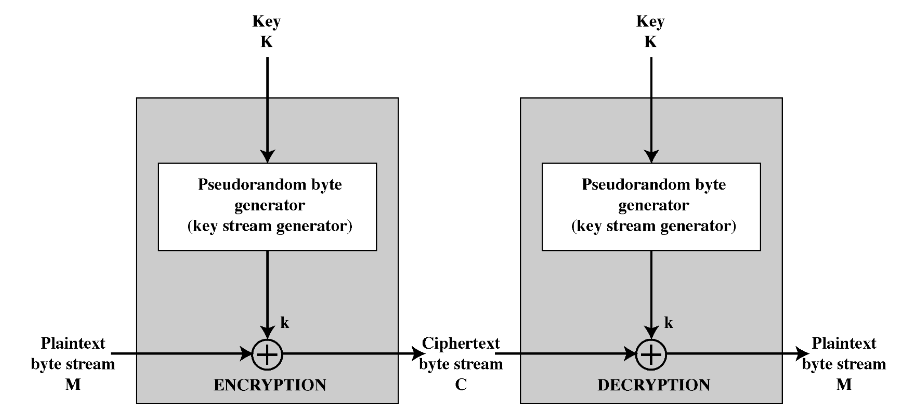

 Mật mã dòng điển hình mã hóa văn bản gốc mỗi lần một byte, mặc dù mật mã dòng có thể được thiết kế để hoạt động trên từng bit một hoặc trên các đơn vị lớn hơn một byte mỗi lần. Trong cấu trúc này, một khóa được đưa vào bộ tạo bit giả ngẫu nhiên để tạo ra một dòng số 8 bit dường như là ngẫu nhiên, thực chất những giá trị ngẫu nhiên này được tạo ra từ 1 thuật toán cụ thể nhưng ta khộng thể đoán trước được nếu không sở hữu khóa đầu vào (input key) _ ta có thể tạm gọi quá trình này là trình tạo khóa dòng ngẫu nhiên. Đầu ra cảu quá trình này được gọi là keysteam (khóa dòng), bằng cách "kết hợp từng byte tại một thời điểm với bản rõ bằng cách sử dụng phép toán bitwise exclusive-"OR (XOR).

 Ví dụ :
 
     	plaintext: 11001100    
xor

		key stream: 01101100  
=>  ciphertext: 10100000  

Việc giải mã phải yêu cầu dùng cùng 1 keystream:

    ciphertext: 10100000  
xor

    key stream: 01101100  
=> plaintext: 11001100

Với bộ tạo số giả ngẫu nhiên được thiết kế phù hợp, mật mã dòng có thể được đảm bảo an toàn như mật mã khối có độ dài khóa tương đương. Ưu điểm chính của mật mã luồng là mật mã luồng hầu như luôn nhanh hơn và sử dụng ít mã hơn nhiều so với mật mã khối. RC4 có thể được triển khai chỉ bằng một vài dòng mã. Tuy nhiên, nếu hai bản rõ được mã hóa bằng cùng một khóa bằng cách sử dụng mật mã dòng thì việc phân tích mật mã thường khá đơn giản. Nếu hai bản mã cùng streamkey của Stream cipher được XOR cùng nhau thì kết quả sẽ là XOR của bản rõ ban đầu. Nếu bản rõ là chuỗi văn bản, số thẻ tín dụng hoặc các stream byte khác có thuộc tính đã biết thì việc phân tích mật mã có thể thành công.

Thuật tóa RC4

Thuật toán RC4 rất đơn giản và khá dễ giải thích. Khóa có độ dài thay đổi từ 1 đến 256 byte (8 đến 2048 bit) được sử dụng để khởi tạo vectơ trạng thái (initialize vector) 256 byte-S, với các phần tử S[0], S[1], …, S[255]. Tại mọi thời điểm, S chứa hoán vị của tất cả các số 8 bit từ 0 đến 255. Để mã hóa và giải mã, một byte K được tạo ra từ S bằng cách chọn một trong 255 phần tử theo cách có hệ thống. Khi mỗi giá trị của K được tạo ra, các phần tử trong S lại được hoán vị.

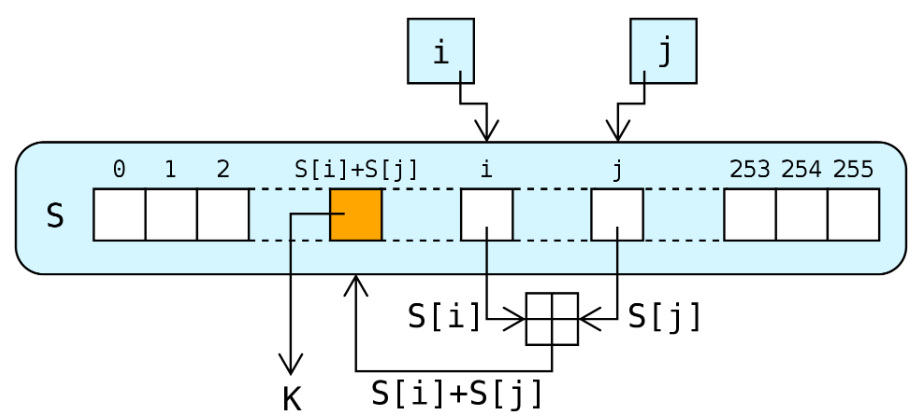

Khởi tạo S

Để bắt đầu, các phần tử của S được đặt bằng các giá trị từ 0 đến 255 theo thứ tự tăng dần; đó là; S[0] = 0, S[1] = 1, ..., S[255] = 255. Một vectơ tạm thời T cũng được khởi tạo. Nếu độ dài của khóa K là 256 byte thì K được chuyển sang T. Mặt khác, đối với khóa có độ dài keylen byte, các phần tử khóa đầu tiên của T được sao chép từ K và sau đó K được lặp lại nhiều lần nếu cần thiết để điền vào T. Ta có thể tóm tắt qua mã giải như sau:

In [ ]:
/* Initialization */
for  i = 0 to 255 do
	S[i] = i;
	T[i] = K[i mod keylen];

Tiếp theo, chúng ta sử dụng T để tạo ra hoán vị ban đầu của S. Điều này bao gồm việc bắt đầu từ S[0] và đến S[255], và với mỗi S[i], hoán đổi S[i] với một byte khác trong S theo sơ đồ được quyết định bởi T[i]:

In [ ]:
/* Initial Permutation of S */
j = 0;
for  i = 0 to 255 do
	j = (j + S[i] + T[i]) mod 256;
	Swap (S[i], S[j]);

Bởi vì thao tác duy nhất trên S là swap nên hiệu ứng duy nhất là hoán vị. S vẫn chứa tất cả các giá trị từ 0 đến 255.

PRGA(Pseudo Random Generation Algorithm)

Sau khi S được khởi tạo, Input Key sẽ không được sử dụng nữa. Ta sẽ tiếp tục khởi tạo keystream K mới dựa trên S đã được khởi tạo thông qua thuật toán được qui ước sẵn. Ta sẽ tiếp tục hoán vị vị trí của từng giá trị của S nhưng đầu ra của ta sẽ phụ thuộc vào độ dài của bản rõ.

In [ ]:
/* Stream Generation */
i, j = 0;
while (true)
	i = (i + 1) mod 256;
	j = (j + S[i]) mod 256;
	Swap (S[i], S[j]);
	t = (S[i] + S[j]) mod 256;
	k = S[t];

Để mã hóa ta sẽ xor k được khởi tạo mỗi vòng với với từng bytes của bản rõ đến khi tất cả các bytes trong bản rõ được xor. Ngược lại để giải mã, ta chỉ việc tái tạo lại K và xor với bản mã sẽ thu được bản rõ ban đầu.

Điểm yếu của RC4:

1. Các Lỗ Hổng về Khóa: RC4 có một lỗ hổng trong thuật toán thiết lập khóa của nó, điều này có nghĩa là một số khóa cụ thể có thể dẫn đến việc xuất ra dữ liệu mất cân đối. Điều này có thể dẫn đến rò rỉ thông tin một phần hoặc hoàn toàn về khóa.
2. Sự Thiên Lệch Thống Kê: Các byte ban đầu của dãy khóa RC4 bị thiên lệch. Điều này có nghĩa là các byte đầu tiên của dãy khóa không ngẫu nhiên như nên, làm cho việc dự đoán chúng dễ dàng hơn đối với kẻ tấn công.
Lập Lịch Khóa: Thuật toán lập lịch khóa của thuật toán có thể tạo ra sự thiên lệch thống kê trong dãy khóa, làm cho việc khôi phục lại khóa mã hóa dễ dàng hơn đối với kẻ tấn công.
3. Dễ Bị Tấn Công Thống Kê: Tấn công Fluhrer-McGrew, đây là một tấn công thống kê đã biết đối với RC4 có thể được sử dụng để xác định khóa trong một số trường hợp. Nó khai thác các sự thiên lệch trong dãy khóa mà phát sinh từ các khóa yếu.